# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline
import matplotlib.pyplot as plt

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
np.random.seed(40)
indices = np.random.randint(0,441,3).tolist()

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4414,1610,1431,3498,387,834
1,4155,367,1390,2306,86,130
2,7579,4956,9426,1669,3321,2566


In [4]:
# Find percentile of purchases for sample customers
from scipy.stats import percentileofscore

pct_samples = pd.DataFrame()

for item in samples:
    pct_scores = []
    for customer in samples.index:
        pct_scores.append(round((percentileofscore(data[item], samples.ix[customer, item])),2))
    pct_samples[item] = pct_scores
    
print("Percentile scores of purchases for sample customers: ")
display(pct_samples)

Percentile scores of purchases for sample customers: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,30.45,26.25,11.36,74.55,34.55,46.48
1,30.00,2.73,10.45,61.82,8.18,7.73
2,46.36,60.45,71.14,52.27,70.68,86.59


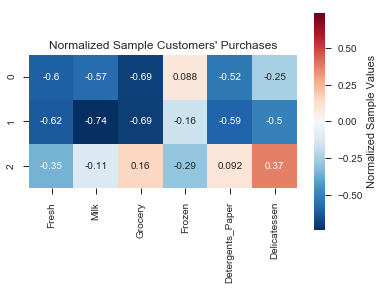

In [114]:
# Examine the normalized expenditures of sample customers
# Data is now in terms of standard deviations from the mean
ax = sns.heatmap((samples - data.mean()) / data.std(ddof=0), annot=True, cbar=True, square=True, \
             cbar_kws={'label': 'Normalized Sample Values'});
plt.title('Normalized Sample Customers\' Purchases');

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** My analysis is based primarily on the percentiles displayed above. These percentages represent the purchase quantity of the sample customer relative to all purchase quantities within a specific category (as an example, 30.45% in the Fresh category means that customer spent more on Fresh items than 30.45% of customers). 

**Customer 0**: The first customer could represent a typical restaurant. They do not buy any category in massive quantities, but purchase more than the average amount of frozen food. Typically, restaurants purchase large quantities of food that can be kept frozen until a shift begins or a meal requiring the ingredient is ordered. Freezing the stored food prevents spoilage that might occur due to fluctuating demand for various ingredients. This customers is below the median for purchases of deli, grocery, fresh, milk, and detergents/paper which all fit with a restaurant that mainly relies on frozen foods but still purchases other items as required. 

**Customer 1**: The second customer could be indicative of a small convenience store such as a gas station or possibly another restaurant with a limited selection of offerings. This customer purchases very small quantities of everything except frozen products, which fits with my experience of convenience store offerings. The low milk, grocery, deli, and detergents/paper purchase amounts would also support this hypothesis although the amount of fresh food combined with the frozen food could mean a restaurant. 

**Customer 2**: The last randomly selected customer in the sample is likely a supermarket. This customer purchases above the median quantities of everything except for fresh food which would seem to suggest that they sell a substantial amount of a diverse variety of items. Most supermarkets have a deli, a fresh market, frozen foods, dairy, and general household items which fits with the percentile purchasing trends. 

Overall, the three customers represent a fairly diverse group. Based on my uninformed knowledge of the wholesale distribution market, I think that these three customers could represent different sectors of the purchasing market. However, if I had to make a classification, I would place customers 0 and 1 into the same category and customer 2 into a separate group. Of course, my analysis is based on my limited personal experience living in the United States, and I am not confident that these observations generalize well to Portugal!

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [10]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Grocery', axis=1)
    
from sklearn.model_selection import train_test_split
# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Grocery'], test_size=0.25, random_state=42)

from sklearn.tree import DecisionTreeRegressor
# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)


# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)

0.681884008544


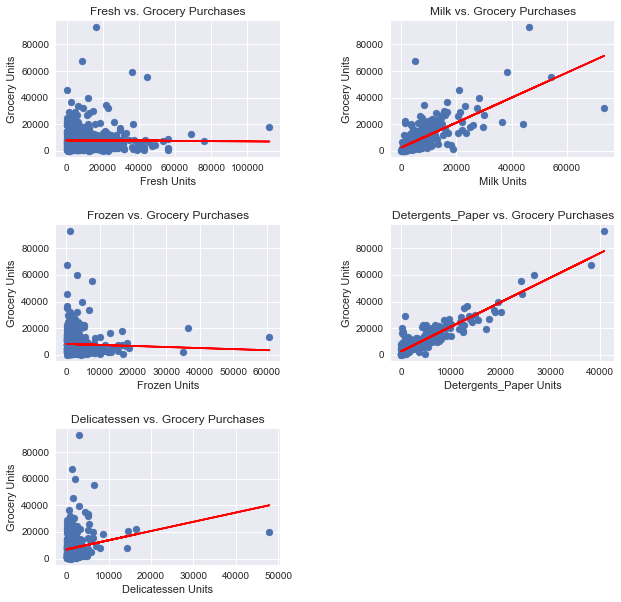

In [11]:
# Plot all categories vs Grocery purchases with trend line
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)

for i, item in enumerate(new_data):
    z = np.polyfit(new_data[item], data['Grocery'], 1)
    p = np.poly1d(z)
    plt.subplot(3,2,i+1)
    plt.scatter(x=new_data[item], y=data['Grocery'])
    plt.plot(new_data[item], p(new_data[item]), "r-")
    plt.xlabel(item +  ' Units'), plt.ylabel('Grocery Units'), plt.title(item +  ' vs. Grocery Purchases')

In [12]:
# Find R^2 value (coefficient of determination) between other items and groceries
from scipy.stats import pearsonr
for category in new_data:
    correlation_coef = pearsonr(new_data[category], data['Grocery'])[0]
    print("Grocery and " + category + " R^2 value = {:.4f}".format(np.square(correlation_coef)))

Grocery and Fresh R^2 value = 0.0001
Grocery and Milk R^2 value = 0.5305
Grocery and Frozen R^2 value = 0.0016
Grocery and Detergents_Paper R^2 value = 0.8550
Grocery and Delicatessen R^2 value = 0.0422


In [23]:
# Find R^2 scores between all variables in dataset using Decision Tree Regressor

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

def calculate_r_2_for_individual_feature(data, feature):
    data_without_feature = data.drop(feature, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(data_without_feature, data[feature], test_size=0.25)
    
    # Create DecisionTree Regressor() and train
    reg = DecisionTreeRegressor()
    reg.fit(X_train, y_train)
    
    # Score the regressor, score is R^2 of linear fit
    score = reg.score(X_test, y_test)
    return score

def r_2_mean(data, feature, runs=200):
    return np.array([calculate_r_2_for_individual_feature(data, feature) for _ in range(runs) ]).mean().round(3)

for category in data:
    print("{0:17} {1}".format(category + " R^2 score with all other features: ", r_2_mean(data,category)))
    

Fresh R^2 score with all other features:  -0.774
Milk R^2 score with all other features:  0.162
Grocery R^2 score with all other features:  0.675
Frozen R^2 score with all other features:  -0.94
Detergents_Paper R^2 score with all other features:  0.688
Delicatessen R^2 score with all other features:  -2.891


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I used the Decision Tree Regressor to predict the Grocery category. Using the five other categories of purchases in the dataset as features, the model was able to predict the grocery purchases with an R^2 ([coefficient of determination](https://mathbits.com/MathBits/TISection/Statistics2/correlation.htm)) value of 0.682. This value means that 68.2% of the variation in the response variable (grocery purchases) can be explained by the explanatory variables (the other five categories) using a linear model. An R^2 value greater than 0.5 generally [indicates a strong linear relationship](https://explorable.com/statistical-correlation) between the response and explanatory variables. Therefore, the Grocery feature is not necessary for identifying customer's spending habits because it can be predicted using the other five variables. In other words, we can remove the Grocery column without losing significant information because the information that was contained in that column can be reconstructed using the other five features. This would be an example of [redundant feature elimination](http://www.machinelearning.org/proceedings/icml2004/papers/231.pdf) where features that are redundant are removed from the data without a detrimental loss of information. It most be noted that [redundant is not the same as irrelevant](https://en.wikipedia.org/wiki/Feature_selection#cite_note-Bermingham-prolog-2), because the grocery category could still be related to the task of grouping customers, but it is redundant in the presence of other variables with which it is highly correlated. 
In addition to calculating the R^2 value between all the other variables combined and the Grocery variable, I created scatterplots of the Grocery category versus each the other individual categories and found the individual R^2 values. From the scatterplots and individual R^2 coefficients, it appears that grocery is most highly correlated with Detergents/Paper and Milk purchases. The amount of grocery purchases for a customer can be predicted fairly accurately by the Detergents/Paper and Milk features which means that Grocery is a redundant feature and would not be necessary for the analysis.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

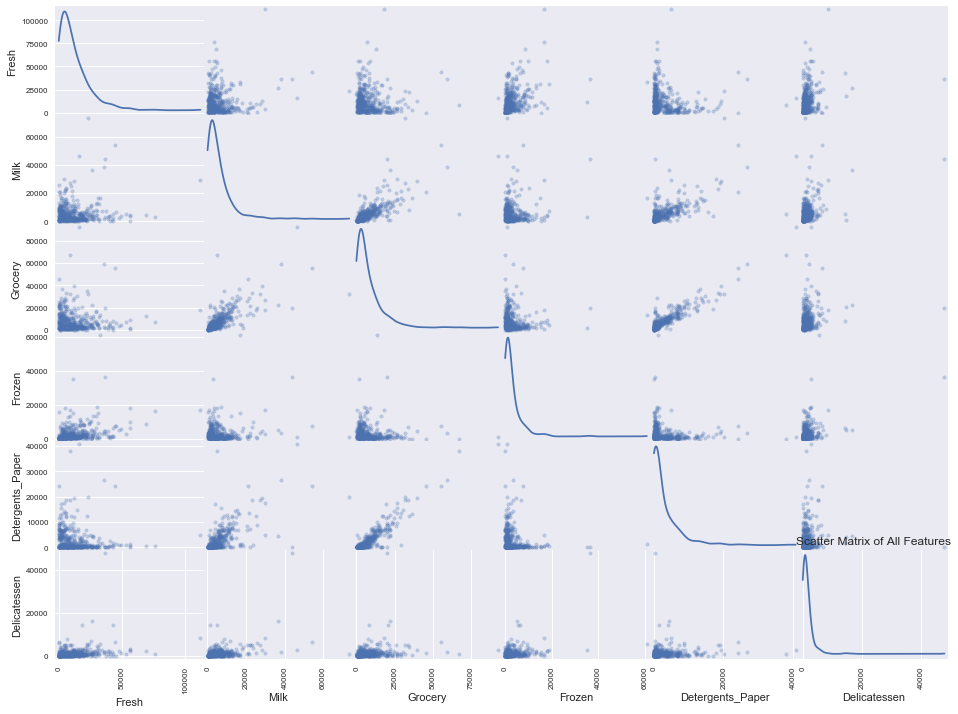

In [41]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (16,12), diagonal = 'kde');

In [25]:
print('Grocery and Detergents_Paper R^2 score = {:.4f}'.format(np.square(pearsonr(data['Grocery'], data['Detergents_Paper'])[0])))
print('Grocery and Milk R^2 score = {:.4f}'.format(np.square(pearsonr(data['Grocery'], data['Milk'])[0])))
print( 'Detergents_Paper and Milk R^2 score = {:.4f}'.format(np.square(pearsonr(data['Detergents_Paper'], data['Milk'])[0])))

Grocery and Detergents_Paper R^2 score = 0.8550
Grocery and Milk R^2 score = 0.5305
Detergents_Paper and Milk R^2 score = 0.4380


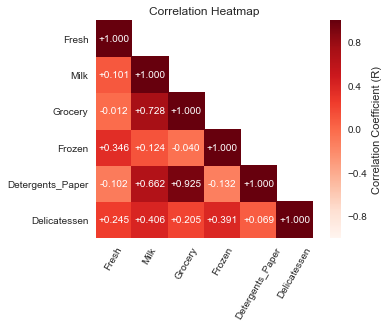

In [40]:
# Visualize all the correlations as a heatmap

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap((corr), mask=mask, square=True, annot=True, cmap='Reds', fmt='+.3f', \
                     cbar_kws={'label' : 'Correlation Coefficient (R)'})
    plt.xticks(rotation=60, ha='center')
    plt.title('Correlation Heatmap')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** Based on the scatterplots and the R^2 values, the pairs of categories Grocery and Detergents/Paper; Milk and Detergents/Paper; and Milk and Grocery all have a degree of linear correlation. The Grocery and Detergents/Paper and Grocery and Milk correlations are considered strong ([by some standards](http://condor.depaul.edu/sjost/it223/documents/correlation.htm) while the Detergents/Paper and Milk correlation is weakly linear. This confirms my hypothesis regarding the relevance of the grocery category. The information in the Grocery feature could be reconstructed from the Milk and Detergents/Paper features and therefore a minimal amount of information is lost if the Grocery category is removed. The correlations for all three of these combinations are positive and linear with the points in the scatterplot lying roughly along a line with a positive slope. This means that as purchases in one category increase, the purchases in the correlated category tend to increase linearly. There may be other non-linear relationships in the data, but only the three linear relationships can be observed in the scatter plots. The data in each individual feature is a skewed distribution with a long tail as indicated by the KDE ([Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)) plots on the diagonal. The vast majority of the customers fall at the lower end of the distribution, with a few outliers at the higher end leading to a long tail on the graphs. 

The correlation heatmap shows the [correlation coefficient](http://www.statisticshowto.com/what-is-the-pearson-correlation-coefficient/)  (Pearson's Product Moment Coefficient) between all pairs of features. While the R^2 value is a measured of how well the independent variable explains the variance in the dependent variable in a linear model, the correlation coefficient, or R, represents how linearly related two variables are and the direction of the relationship. It ranges -1, a perfectly negative linear relationship to 1, a perfectly positive linear relationship (i.e., an increase in the independent value will result in a perfectly linear increase in the response variable). Based on the heatmap, the two most linearly correlated pairs of features are Detergents_Paper and Grocery, and Milk and Grocery. This result is in full agreement with the scatterplots and R^2 coefficient as expected and shows that customers who make more purchases in one of these categories also tend to have larger purchases in the related category. 


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

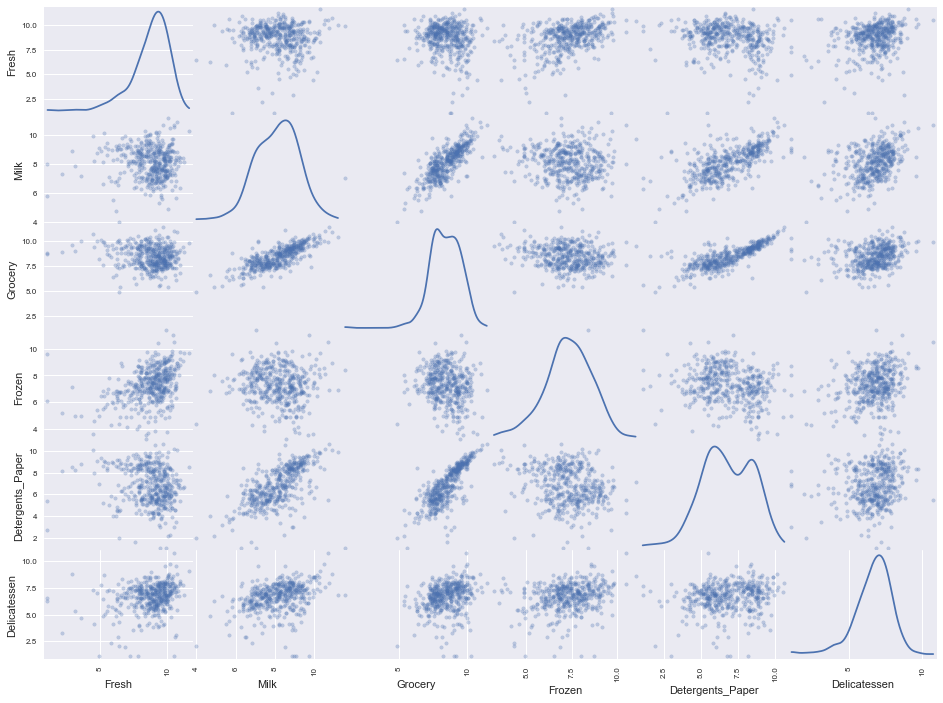

In [44]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (16,12), diagonal = 'kde');

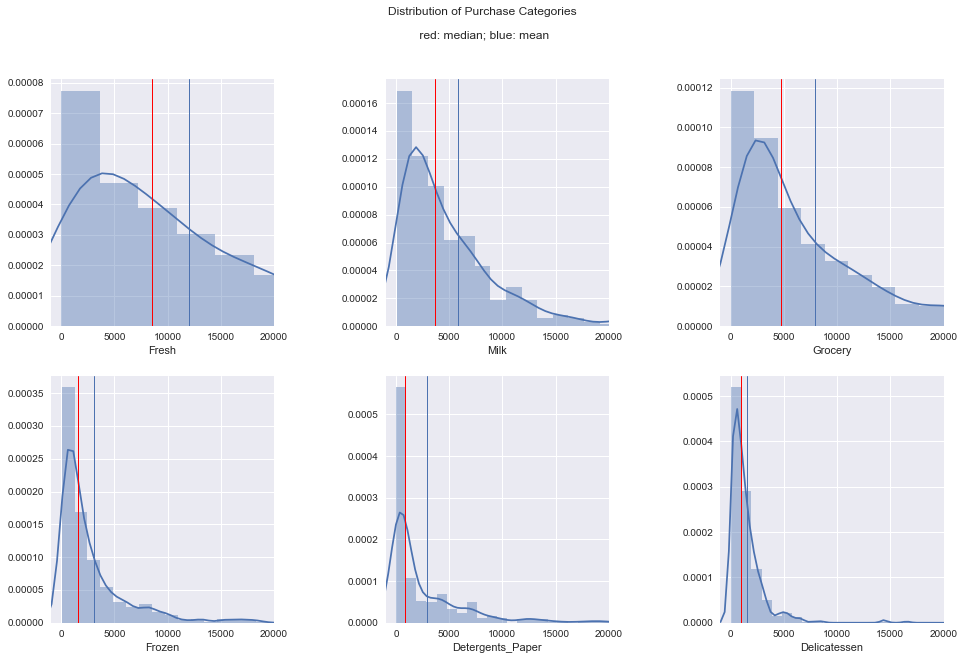

In [57]:
# Visualize data before scaling

fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(16,10)
fig.subplots_adjust(wspace=0.5)
fig.suptitle('Distribution of Purchase Categories Before Scaling\n\n red: median; blue: mean')

for i, col in enumerate(data.columns):
    category = data[col]
    sns.distplot(category, label=col, ax=axes[i]).set(xlim=(-1000, 20000),)
    axes[i].axvline(category.mean(), linewidth=1)
    axes[i].axvline(category.median(), linewidth=1, color='r')

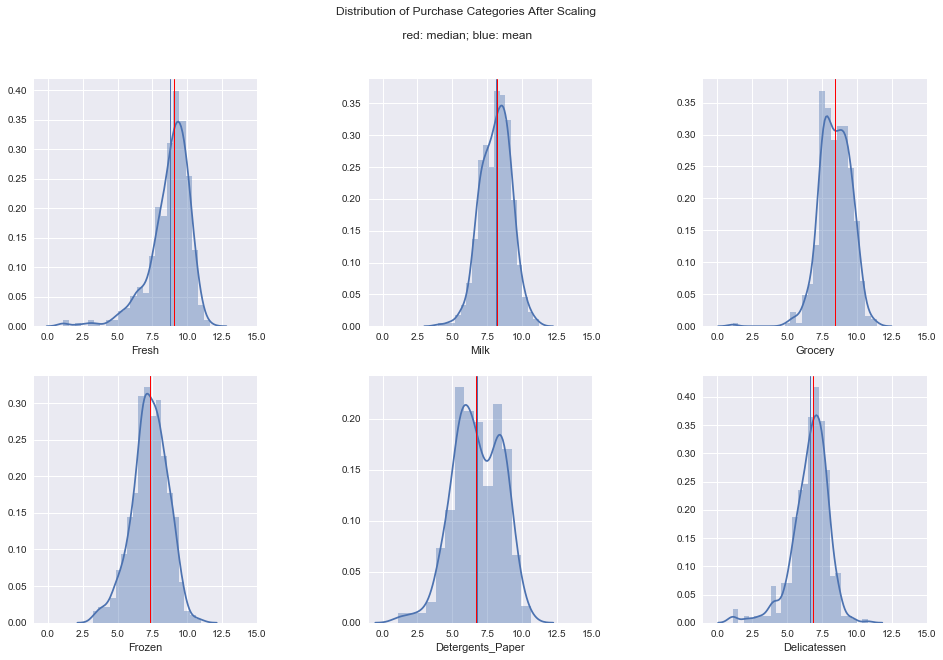

In [63]:
# Visualize data after scaling

fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(16,10)
fig.subplots_adjust(wspace=0.5)
fig.suptitle('Distribution of Purchase Categories After Scaling\n\n red: median; blue: mean')

for i, col in enumerate(log_data.columns):
    category = log_data[col]
    sns.distplot(category, label=col, ax=axes[i]).set(xlim=(-1, 15),)
    axes[i].axvline(category.mean(), linewidth=1)
    axes[i].axvline(category.median(), linewidth=1, color='r')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [64]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.392537,7.383989,7.266129,8.159947,5.958425,6.726233
1,8.332068,5.905362,7.237059,7.743270,4.454347,4.867534
2,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104


In [65]:
print('Grocery and Detergents_Paper R^2 score after transformation = {:.4f}'.format(np.square(pearsonr(log_data['Grocery'], log_data['Detergents_Paper'])[0])))
print('Grocery and Milk R^2 score after transformation = {:.4f}'.format(np.square(pearsonr(log_data['Grocery'], log_data['Milk'])[0])))
print( 'Detergents_Paper and Milk R^2 score after transformation = {:.4f}'.format(np.square(pearsonr(log_data['Detergents_Paper'], log_data['Milk'])[0])))

Grocery and Detergents_Paper R^2 score after transformation = 0.6342
Grocery and Milk R^2 score after transformation = 0.5759
Detergents_Paper and Milk R^2 score after transformation = 0.4596


It appears that the same three positive correlations (Milk and Grocery; Detergents/Paper and Grocery; Delicatessen and Grocery) are present in the natural log transformed data. However, the Grocery and Detergents/Paper relationship is not as strong, while the Grocery and Milk, and Detergents/Paper and Milk relationships are better represented by a linear model after the transformation. All of the distributions for the six features are normally distributed after the log transformation as shown in the KDE plots on the diagonal of the scatter matrix. 

Observing the distribution graphs before and after the transformation, the data is much more normally distributed after the natural log transformation. This can be seen in the both the shape of the distribution and the relative positions of the mean and median. Prior to the transformation, the mean for all the categories was well above the median indicating that the distribution was long tailed or positively skewed as there were a few outliers at the top end of the range. After the transformation, the data is normally distributed and the mean and the median are in much closer agreement because using the natural log diminishes the skewing effect of outliers.

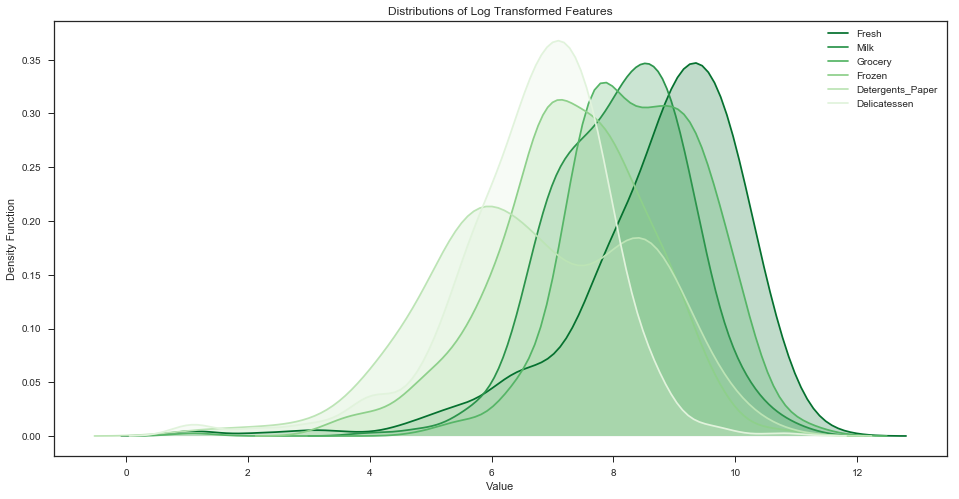

In [71]:
# Plot distributions of before and after ln tranform on top of each other
sns.set_style('ticks')
with sns.color_palette("Greens_r"):
    # Plot densities of log data 
    plt.figure(figsize=(16,8))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc='best')
    plt.title('Distributions of Log Transformed Features')
    plt.xlabel('Value'); plt.ylabel('Density Function');

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [72]:
# For each feature find the data points with extreme high or low values
outlier_dict = {}
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outliers)
    for customer in outliers.index:
        if customer not in outlier_dict.keys():
            outlier_dict[customer] = 1
        else:
            outlier_dict[customer] += 1
    
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [74]:
# Find customers appearing as outliers more than once
for customer in outlier_dict.keys():
    if outlier_dict[customer] == 1:
        outlier_dict.pop(customer)

In [77]:
# Find percentile scores of all outliers
outlier_pct = pd.DataFrame(columns=data.columns)

for customer in outlier_dict.keys():
    pct_scores = []
    for category in data:
        pct_scores.append(round((percentileofscore(data[category], data.ix[customer, category])),2))
    outlier_pct.loc[customer] = pct_scores

print("Outlier number of appearances: ")
print(outlier_dict)
    
print("\nPercentile scores of outliers: ")
display(outlier_pct)

Outlier number of appearances: 
{128: 2, 154: 3, 65: 2, 66: 2, 75: 2}

Percentile scores of outliers: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,2.27,82.50,44.32,5.45,55.68,0.57
154,7.73,0.23,0.45,2.50,0.91,1.36
65,1.59,96.14,99.09,0.68,99.32,65.68
66,0.68,25.23,64.77,6.14,71.82,2.50
75,82.50,17.27,0.23,79.77,0.34,50.45


In [78]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** There are 5 customers that are considered outliers in more than one category. However, based upon the percentile scores for these customers I only removed customer 154 from the data. Customer 154 was the only customer to appear more than twice as outlier, and while the other customers were only lower or higher than the average in two categories, customer 154 was far below the median (the 50th percentile) in all categories. All of the customers' data seems valid, but customer 154 is likely not indicative of a specific type of customer and would not help in identifying patterns in the data. Meanwhile, the other customers in the outlier dictionary could show trends, such as customer 65 and 66, both of whom purchase far less than the median amount of Fresh and Frozen, but purchase above the median for Grocery and Detergents/Paper. This could be a customer tendency waiting to be found in the data that the distributor could adjust for as opposed to an anomaly that should be removed from the data. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

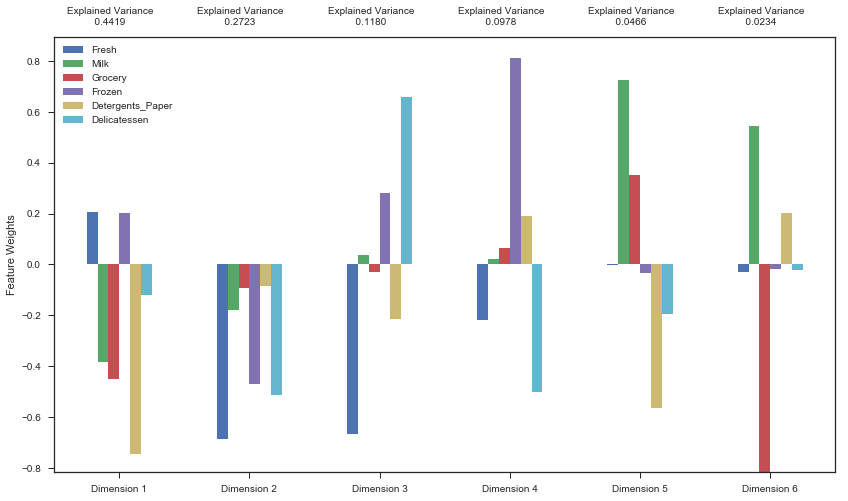

In [79]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

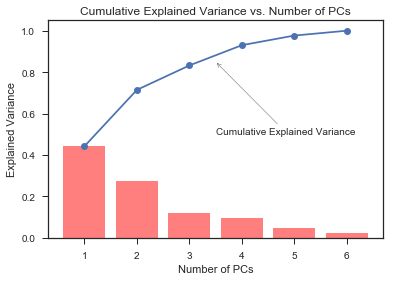

In [89]:
num_components = np.arange(1, 7)
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
plt.plot(num_components, cumulative_variance_explained, '-o');
plt.annotate('Cumulative Explained Variance', xy=(3.5, 0.85), arrowprops=dict(arrowstyle='->'),xytext=(3.5, 0.5))
plt.bar(num_components, pca.explained_variance_ratio_, align='center', alpha=0.5, color='red')
plt.xlabel('Number of PCs'); plt.ylabel('Explained Variance'); plt.title('Cumulative Explained Variance vs. Number of PCs');

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** The first and second principal components explain a total of **71.42%** of the variance in the data. The first four principal components explain a total of **93.00%** of the total variance in the data. This suggests that only the first four principal components need to be kept to represent all of the data without a significant loss of information. 

The weights of the features in the principal components is another method of finding correlations between the features. For example, in the first principal component, the Detergents/Paper, Grocery, Milk, and Delicatessen features are all weighted negatively, with Detergents/Paper carrying the most negative weight. This means that as values are increased along the first prinicipal dimension, Detergents/Paper, Milk, Grocery, and Deli purchases all decrease with Detergents/Paper purchases decreasing the greatest amount. On the other hand, the Frozen and Fresh features increase moving positively along the first principal component. Therefore, we can conclude that the first principal component demonstrates that customers fall into two groups along this component, those who purchase more Frozen and Fresh products, and those who purchase more of the four other categories. We can make similar observations using the other components. For the third principal component, we can see that Fresh, Grocery, and Detergents/Paper all decrease as the values along the dimension increase with Fresh decreasing at the fastest rate as it has the most negative weight. This suggests that another grouping of customers could be those who buy these three categories and those who make purchases in the Delicatessen, Milk, and Frozen categories. The "strongest" grouping, or the one that should be the main focus of the distributor, is that shown by the first principal component because that is the dimension that explains the greatest percentage of the variance in the dataset. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [ ]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

In [ ]:
print("Percentile scores of sample customers: ")
display(pct_samples)

Yes, this data does agree with my initial observations. Customers 0 and 1 purchased relatively more Fresh and Frozen products than other categories. Therefore, I would expect them to record high scores along the first principal dimension as is indicated by their relative value along that direction. Meanwhile, Customer 2 purchased higher relative amounts of the categories besides Fresh and Frozen, which would suggest that their score for the first principal dimension should be negative. Again, that is what is observed in the table of principal component values. Based upon the graph and the sample customers, I would say that the first principal component illustrates a classification of customers who purchase mainly Fresh and Frozen categories and those who purchase Milk, Grocery, Detergents/Paper, and Deli. Customers 0 and 1 would fall into the first segment, and Customer 2 would fall into the second segment.

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [90]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [91]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.5370,0.1247
1,3.3629,1.7125
2,-1.5137,-1.0349


## Visualizing a Biplot

A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case Dimension 1 and Dimension 2). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.
Run the code cell below to produce a biplot of the reduced-dimension data.

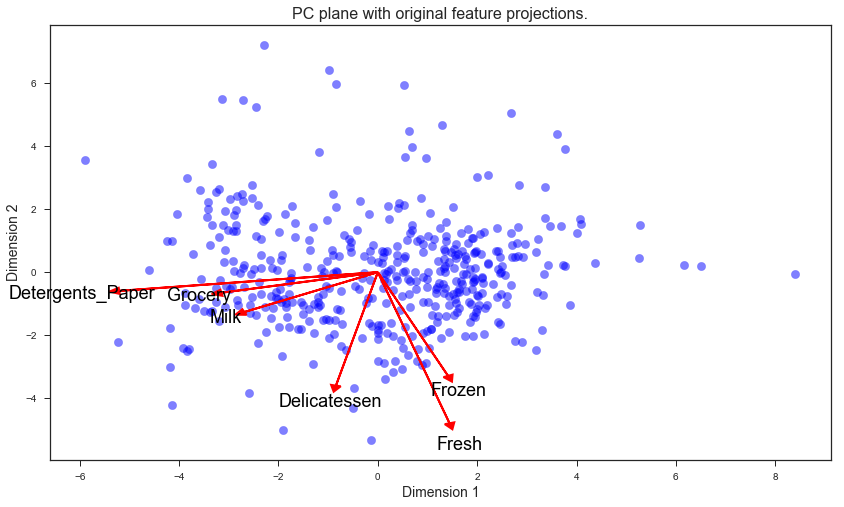

In [93]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca);

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on 'Milk', 'Grocery' and 'Detergents_Paper', but not so much on the other product categories.
From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

Based on the biplot, Detergents/Paper and Grocery are most strongly correlated with the first principal components (in terms of magnitude). The second principal component is most strongly correlated (again in terms of magnitude) with the Delicatessen and Fresh categories. Both of these observations agree with the pca_results plot from earlier analysis of the PCA application. The directions associated with the PCA (the signs on the feature weights) are arbitrary, but the weights themselves and the differences in directions between features are the crucial aspects of the PCA. This means that along the first principal dimension, Detergents/Paper, Grocery, Milk, and Delicatessen could be positive if the PCA is performed again, but then the Fresh and Frozen would be negative along the first PCA. All feature weights would maintain the same magnitude. This would result in the biplot being mirrored or rotated 180 degrees. The magnitude of the feature weights remain the same, and the differences between feature weight signs do not change, but the directions along the principal dimensions can be switched when performing Principal Components Analysis. 

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** The K-Means clustering algorithm is an example of [hard clustering](http://artint.info/html/ArtInt_252.html) which means that each data point is placed firmly into one class. This works well with datasets that form well-separated clusters with clear distinctions between classes. The Gaussian Mixture Model (GMM) is an example of [soft clustering](https://en.wikipedia.org/wiki/Fuzzy_clustering) where a data point can belong to different classes. A GMM assigns a class probability to each data point rather than making a firm decision about the classification of the instance. Gaussian Mixture Models are better suited to data that does not fall into clean clusters. Based on the biplot and the analysis of the customer data thus far, the Gaussian Mixture Model is better suited to forming clusters of the data. The biplot illustrates there are no clearly delineated clusters, and some data points should not be firmly placed into one category or another indicating that the Gaussian Mixture Model is well-suited for this application

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

Clusters: 2; Silhouette Score = 0.4118
Clusters: 3; Silhouette Score = 0.4091
Clusters: 4; Silhouette Score = 0.2882
Clusters: 5; Silhouette Score = 0.1858
Clusters: 6; Silhouette Score = 0.3216
Clusters: 7; Silhouette Score = 0.2762
Clusters: 8; Silhouette Score = 0.3481
Clusters: 9; Silhouette Score = 0.3391
Clusters: 10; Silhouette Score = 0.3221


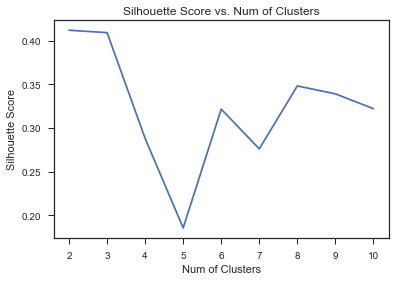

In [94]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

scores = []
for i in range(2, 11):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    n_clusters = i
    clusterer = GaussianMixture(n_components=n_clusters, random_state=42).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    scores.append(score)
    print('Clusters: {}; Silhouette Score = {:.4f}'.format(n_clusters, score))
    
plt.plot(np.arange(2,11), scores);
plt.xlabel('Num of Clusters'); plt.ylabel('Silhouette Score'); plt.title('Silhouette Score vs. Num of Clusters with Outliers Removed');

In [95]:
# Perform PCA with outliers included
pca_outliers = PCA(n_components=2).fit(log_data)

# Transform data using pca trained on dataset with no outliers removed
reduced_data_outliers = pca_outliers.transform(log_data)
pca_samples_outliers = pca_outliers.transform(log_samples)

# Create a DataFrame for the reduced data with outliers
reduced_data_outliers = pd.DataFrame(reduced_data_outliers, columns = ['Dimension 1', 'Dimension 2'])

Clusters: 2; Silhouette Score = 0.4099
Clusters: 3; Silhouette Score = 0.4106
Clusters: 4; Silhouette Score = 0.3029
Clusters: 5; Silhouette Score = 0.2344
Clusters: 6; Silhouette Score = 0.2975
Clusters: 7; Silhouette Score = 0.3530
Clusters: 8; Silhouette Score = 0.3142
Clusters: 9; Silhouette Score = 0.3030
Clusters: 10; Silhouette Score = 0.2921


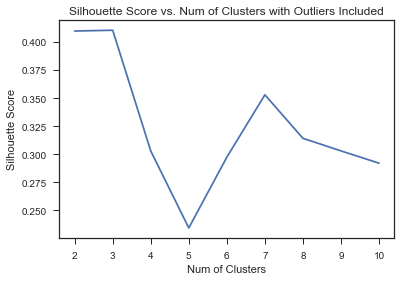

In [96]:
scores_outliers = []
for i in range(2, 11):
    # TODO: Apply your clustering algorithm of choice to the reduced data with outliers
    n_clusters = i
    clusterer = GaussianMixture(n_components=n_clusters, random_state=42).fit(reduced_data_outliers)

    # TODO: Predict the cluster for each data point
    preds_outliers = clusterer.predict(reduced_data_outliers)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds_outliers = clusterer.predict(pca_samples_outliers)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data_outliers, preds_outliers)
    scores_outliers.append(score)
    print('Clusters: {}; Silhouette Score = {:.4f}'.format(n_clusters, score))
    
plt.plot(np.arange(2,11), scores_outliers);
plt.xlabel('Num of Clusters'); plt.ylabel('Silhouette Score'); plt.title('Silhouette Score vs. Num of Clusters with Outliers Included');

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** The full table of number of clusters tried and silhouette scores is shown below. The best number of clusters as measured by the silhouette score was 2.  

| **Num of Clusters** | **Silhouette Score** |
|:---------------:|------------------|
|        2        |      0.4118      |
|        3        |      0.4091      |
|        4        |      0.2882      |
|        5        |      0.1858      |
|        6        |      0.3216      |
|        7        |      0.3481      |
|        8        |      0.3481      |
|        9        |      0.3391      |
|        10       |      0.3221      |

Including the outlier (Customer 154) in the dataset resulted in 3 components achieving the highest silhouette score after performing the Principal Component Analysis. However, as I did remove this outlier from the dataset, I have decided that the optimal number of componets is 2 as indicated by the silhouette score run on the dataset with the outlier removed.

In [97]:
# Create clustering model with optimal number of components as measured by silhouette score 
clusterer = GaussianMixture(n_components=2, random_state=42)

# Fit to the processed data and make predictions
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
sample_preds = clusterer.predict(pca_samples)
centers = clusterer.means_

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

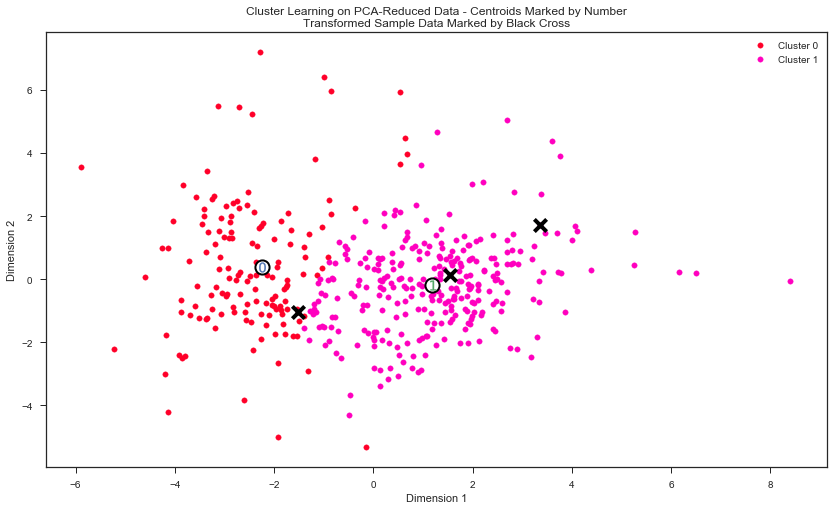

In [98]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [99]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
print("Centers of clusters:")
display(true_centers)

Centers of clusters:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3025.0,7483.0,12336.0,795.0,4577.0,854.0
Segment 1,9092.0,2241.0,2803.0,2079.0,379.0,762.0


In [100]:
centers_pct = pd.DataFrame(columns=data.columns)

for center in true_centers.index.tolist():
    pct_scores = []
    for category in data:
        pct_scores.append(round((percentileofscore(data[category], true_centers.ix[center, category])),2))
    centers_pct.loc[center] = pct_scores
    
print("Percentile scores of cluster centers: ")
display(centers_pct)

Percentile scores of cluster centers: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,23.41,76.59,80.68,26.82,79.32,47.05
Segment 1,52.50,35.91,34.32,58.41,33.86,42.73


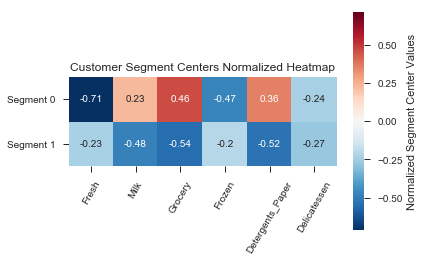

In [125]:
ax = sns.heatmap( (true_centers - data.mean()) / data.std(ddof=1), annot=True, cbar=True, \
             square=True, cbar_kws={'label': 'Normalized Segment Center Values'})
plt.xticks(rotation='60', ha='center'); plt.yticks(rotation='0');
plt.title('Customer Segment Centers Normalized Heatmap');
            

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** 

**Customer Segment 0**: The first customer segment most likely represents a supermarket. This segment purchases above the median amount of Milk, Detergents/Paper, and Grocery which fits with a supermarket that has a dairy section, a household goods section, and a grocery section. The purchases in the Fresh and Frozen categories are both below the mean which fits with a typical supermarket that with a small selection of food items. The Delicatessen category is near the median (the 50th percentile) indicating that most of these customers likely sell a moderate amount of deli products as well. 

**Customer Segment 1**: The second customer segment could be a restaurant. These customers purchase more than the median amounts of Fresh and Frozen products and below the median in all other categories. This would be representative of a restaurant that purchases Frozen food to account for variability in consumer demand and also needs Fresh items on hand. Restaurants typically do not need to purchase as much dairy or grocery items as department stores, but they do need would need some Deli items and a minimum amount of Detergents/Paper to remain stocked. 

These classifications are not clearly defined as illustrated in the plot of all the data points (customers) colored by cluster. There is significant overlap between the classes and a large percentage of customers do not fall cleanly into one cluster. There are some weak trends, such as the low purchase quantities of Fresh and Frozen for the first segment and the relatively higher purchases in these categories in the second segment, but overall, there is no clear delineation between the groups.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [ ]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

**Answer:** The first two customers are projected to belong to Cluster 1, the customer segment that I identified as restaurants. The third sample customer is predicted to be in Cluster 0, or the supermarket segment. Referring again to the percentile scores for these customers, these classifications are appropriate. Customers 0 and 1 purchased higher amounts of Fresh and Frozen items while Customer 2 purchased relatively highly amounts of the remaining four categories. Examining the plot of all customers colored by segment, Customers 0 and 1 clearly fall into Cluster 1, while Customer 2 is on the boundary between the two clusters. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** The wholesale distributor could use the classes to run an A/B test on a small sample from each segment to determine whether the change is appropriate for that segment. [Based on the results of the A/B test](https://vwo.com/ab-testing/), if the change passes both a statistical and practical threshold for significance in a positive direction for one of the subsets (as determined through [hypothesis testing](http://blog.minitab.com/blog/adventures-in-statistics-2/understanding-hypothesis-tests%3A-significance-levels-alpha-and-p-values-in-statistics)), the wholesale distributor could then apply the change to that entire grouping of customers. Additionally, the distributor could take a poll of all members in both groups to judge the sentiment towards the proposed change in delivery service. It could be that restaurants (identified as cluster 1) require smaller deliveries 5 days a week while supermarkets (cluster 0) require larger deliveries but only 3 times a week. The most important aspect of the delivery service proposal is that the wholesale distributor should not naively make the change for all members of both group. Each group will be affected in a different manner, and applying the change all at once for all customers could result in decreased sales if customers respond negatively and change distributors. The clustering model has identified potential groupings that could be useful, but the distributor should use caution when applying the results, especially as the groupings are not cleanly divided. I would suggest that the distributor collect more data on the customers (as more data has a [profound positive influence](http://clair.si.umich.edu/si767/papers/Week06/TextRepresentation/Halevy.pdf) on the performance of any machine learning algorithm) in order to solidfy the decision boundaries between customer segments. The distributor could also use more features to create further segments. With two cluster centers, the information provided is coarse, and additional features may allow the distributor to refine the categories and tailor service more closely to the needs of each customer class. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** With the addition of the customer segment data to the dataset, the problem is now [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning). The features are still the same features as in the unsupervised problem, but now the customer segment data is the target label. Given the features and the labels, a supervised machine learning algorithm (such as a SVM or Decision Tree) can be trained to predict the label of a new customer from the features of that customer. If there are more than two customer segments, this would be a [multiclass classfication](http://scikit-learn.org/stable/modules/multiclass.html) problem because the targets can take on more than two values. The algorithm would be trained and tuned on a set of training data (features and labels) with cross validation, tested on a testing set to assess the performance, and then employed to predict the classes of the new customers given their estimated product spending. The distributor would then be able to design the optimal service for these new customers based on their classification from the model. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'`in the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [ ]:
# Display the clustering results based on 'Channel' data column
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The clustering algorithm agrees well with the underlying distribution of Retailer and Hotel/Restaurant/Cafe customer classes. From the above plot showing the actual distribution of customer channel classes, the customers are not cleanly grouped into the two categories which was a conclusion also drawn from the Gaussian Mixture Model. There is a slight clustering with some customers definitively in one of the two channel categories, but there is also a considerable amount of mixing between the two segments. The Hotel/Restaurant segment appears to be a relatively purer grouping, with a noticeably high density of points near the first sample point (labeled 0) which also is close to the center of Segment 1 identified through the clustering analysis. I would consider the breakdown of customers in the actual data to be in line with my earlier identification of Segment 0 as supermarkets and Segment 1 as restaurants. Two groupings of customer also seems to be the appropriate number for the clustering model based on the above plot, although there could be more grouping that emerge in a higher dimension if additional principal components are retained. Overall, the clustering analysis has revealed the underlying trends in the data to the extent that they exist. However, the model has also shown the limitations of the data and that there is not a well-defined separation between the customer segments in this dataset. Machine learning algorithms are powerful tools, but in the end, the effectiveness of any model is impacted by the quality of the data, and this is a case where more information is needed to create an optimal model. The wholesale distributor is on the right track by searching for the trends in the data, but to maximize the efficiency of the distribution system, more data at a higher level of detail is required. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.